In [1]:


import diff_classifier.aws as aws
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from os import listdir, getcwd, chdir
from os.path import isfile, join
import os

In [2]:
workbookDir = getcwd()
print('Current Notebook Dir: ' + workbookDir)
chdir(workbookDir) # Go to current workbook Dir
chdir('..')        # Go up one
print(f'Using current directory for loading data: {getcwd()}')
workbookDir = getcwd()

Current Notebook Dir: /Users/nelsschimek/Documents/Nance Lab/diff_predictor/notebooks
Using current directory for loading data: /Users/nelsschimek/Documents/Nance Lab/diff_predictor


In [3]:
dataset_path = workbookDir + '/data/age_traj_count_outputs'
#filelist = [f for f in listdir(dataset_path) if isfile(join(dataset_path, f)) and 'file' in f]

In [54]:
filelist = ['one_files_run_data.csv',
            'two_file_run_data.csv',
            'three_file_run_data.csv',
            'four_file_run_data.csv',
            'five_file_run_data.csv',
            'six_file_run_data.csv',
            'seven_file_run_data.csv',
            'eight_file_run_data.csv',
            'nine_file_run_data.csv',
            'ten_file_run_data.csv',
            'eleven_file_run_data.csv',
            'twelve_file_run_data.csv',
            'thirteen_files_run_data.csv',
            'fourteen_files_run_data.csv',
            'fifteen_files_run_data.csv',
]

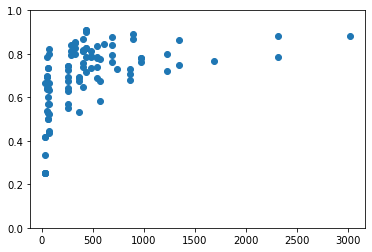

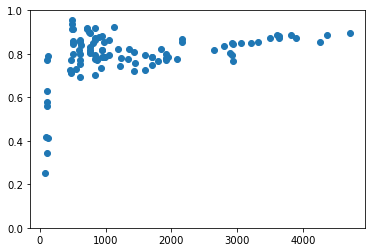

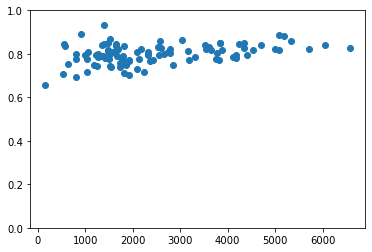

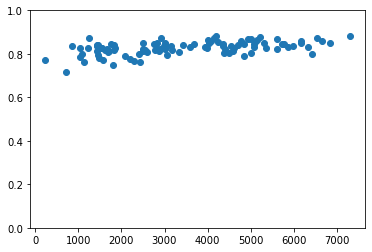

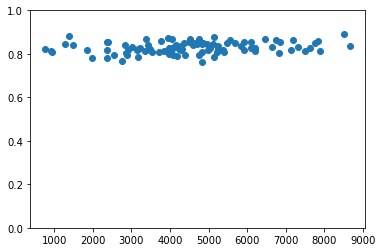

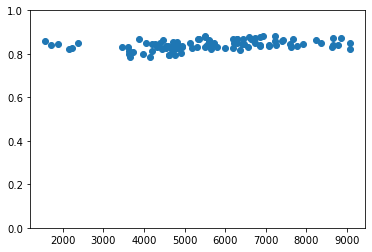

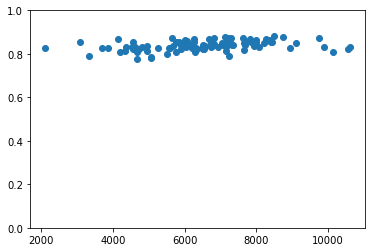

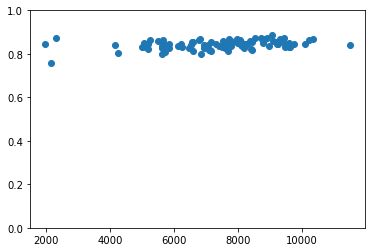

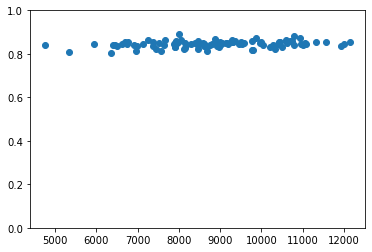

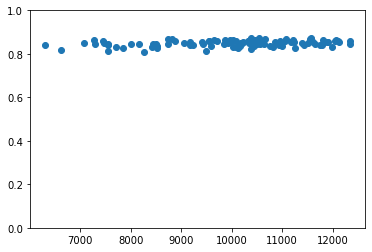

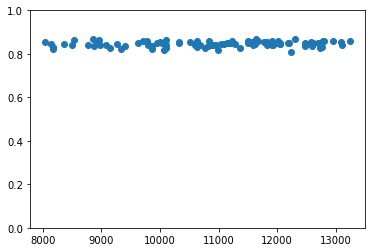

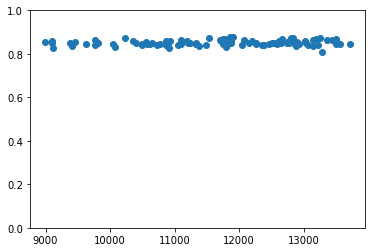

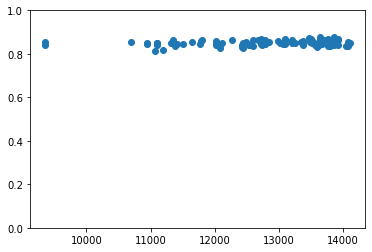

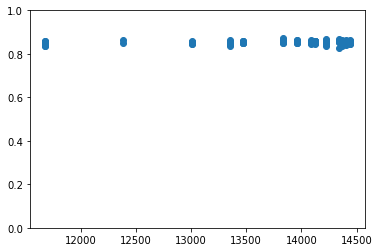

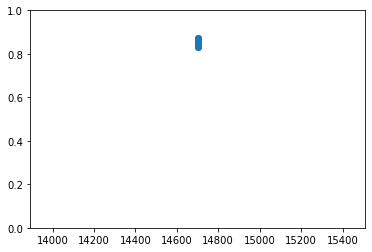

In [120]:
accuracy_list = []
min_acc = []
max_acc = []
var_list = []
stdev_list = []
traj_count_list = []
for file in filelist:
    df = pd.read_csv(workbookDir + '/data/age_traj_count_outputs/' + file)
    accuracy_list.append(df['Accuracies'].mean())
    min_acc.append(df['Accuracies'].min())
    max_acc.append(df['Accuracies'].max())
    var_list.append(df['Accuracies'].var())
    stdev_list.append(df['Accuracies'].std())
    traj_count_list.append(df['Trajectory Count'].mean())
    fig = plt.subplots()
    plt.scatter(df['Trajectory Count'], df['Accuracies'])
    plt.ylim([0,1])



In [86]:
np.array(accuracy_list) + np.array(var_list)

array([0.72178969, 0.80803792, 0.80209387, 0.82879114, 0.83081921,
       0.84211793, 0.83905796, 0.84356982, 0.84559439, 0.84892422,
       0.84613004, 0.85165628, 0.84992035, 0.85355089, 0.85407044])

In [54]:
filelist = ['one_files_run_data.csv',
            'two_file_run_data.csv',
            'three_file_run_data.csv',
            'four_file_run_data.csv',
            'five_file_run_data.csv',
            'six_file_run_data.csv',
            'seven_file_run_data.csv',
            'eight_file_run_data.csv',
            'nine_file_run_data.csv',
            'ten_file_run_data.csv',
            'eleven_file_run_data.csv',
            'twelve_file_run_data.csv',
            'thirteen_files_run_data.csv',
            'fourteen_files_run_data.csv',
            'fifteen_files_run_data.csv',
]

Text(0.5, 1.0, 'Mean accuracy across 100 models')

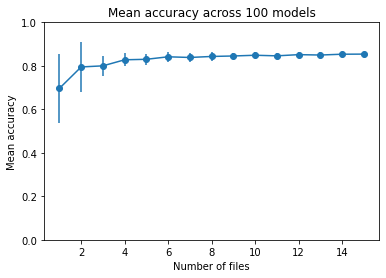

In [148]:
fig, ax = plt.subplots()
#ax.errorbar(traj_count_list, accuracy_list, yerr=stdev_list, fmt='-o')
ax.errorbar(np.arange(1,16), accuracy_list, yerr=stdev_list, fmt='-o')

# plt.scatter(x=traj_count_list, y=accuracy_list, c='m')
# plt.scatter(traj_count_list, min_acc, c='g')
# plt.scatter(traj_count_list, max_acc, c='b')
plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Number of files')
plt.title('Mean accuracy across 100 models')


Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

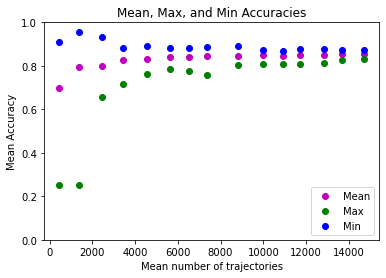

In [149]:
fig, ax = plt.subplots()
plt.scatter(x=traj_count_list, y=accuracy_list, c='m', label='Mean')
plt.scatter(traj_count_list, min_acc, c='g', label='Max')
plt.scatter(traj_count_list, max_acc, c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')


Text(0.5, 1.0, 'Mean Accuracy vs Variance for random file subsets')

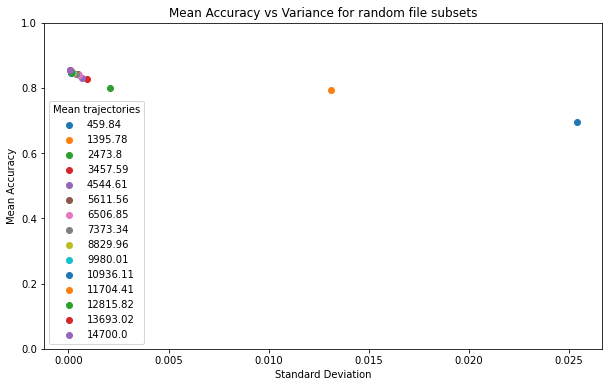

In [151]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(accuracy_list)):
    plt.scatter(var_list[i], accuracy_list[i], label=traj_count_list[i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Variance for random file subsets')

(0.0, 1.0)

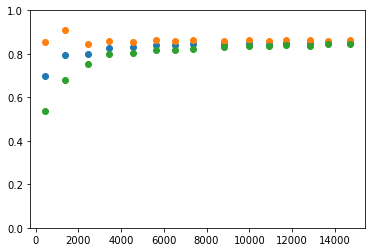

In [90]:
plt.scatter(x=traj_count_list, y=accuracy_list)
plt.scatter(traj_count_list, np.array(accuracy_list) + np.array(stdev_list))
plt.scatter(traj_count_list, np.array(accuracy_list) - np.array(stdev_list))
plt.ylim([0,1])

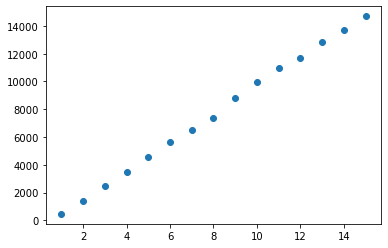

In [76]:
plt.scatter(x=np.arange(1,16), y=traj_count_list)
#plt.ylim([0,1])

(0.0, 1.0)

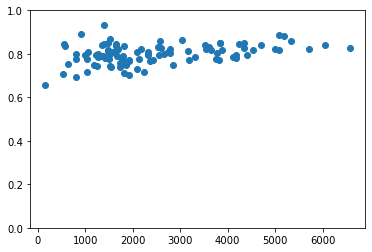

In [24]:
plt.scatter(df['Trajectory Count'], df['Accuracies'])
plt.ylim([0,1])

(array([ 7., 17., 26., 15.,  8., 10.,  8.,  5.,  2.,  2.]),
 array([ 162. ,  802.8, 1443.6, 2084.4, 2725.2, 3366. , 4006.8, 4647.6,
        5288.4, 5929.2, 6570. ]),
 <a list of 10 Patch objects>)

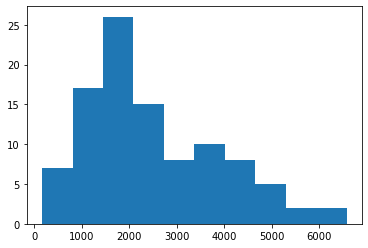

In [37]:
plt.hist(df_3f['Trajectory Count'])

(array([ 1.,  0.,  2.,  1.,  0.,  1.,  5.,  3., 10.,  4.,  4.,  4., 11.,
        11., 10.,  7.,  7.,  4.,  5.,  3.,  4.,  0.,  1.,  1.,  1.]),
 array([0.64705882, 0.65917647, 0.67129412, 0.68341176, 0.69552941,
        0.70764706, 0.71976471, 0.73188235, 0.744     , 0.75611765,
        0.76823529, 0.78035294, 0.79247059, 0.80458824, 0.81670588,
        0.82882353, 0.84094118, 0.85305882, 0.86517647, 0.87729412,
        0.88941176, 0.90152941, 0.91364706, 0.92576471, 0.93788235,
        0.95      ]),
 <a list of 25 Patch objects>)

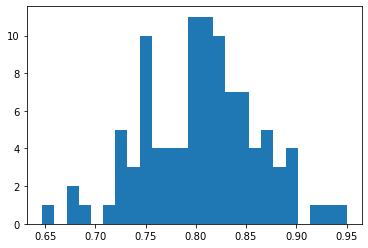

In [31]:
plt.hist(df['Accuracies'], 25)

In [27]:
df['Trajectory Count'].mean()

2473.8

Text(0.5, 1.0, 'XGBoost accuracy vs Number of Trajectories')

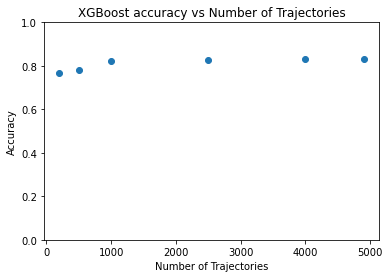

In [135]:
x = [200, 500, 1000, 2500, 4000, 4900]
y = [0.7677, 0.7787, 0.8240, 0.8272, 0.8329, 0.8304]
plt.scatter(x, y)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.xlabel('Number of Trajectories')
plt.title('XGBoost accuracy vs Number of Trajectories')

Text(0.5, 1.0, 'XGBoost accuracy vs Number of Trajectories')

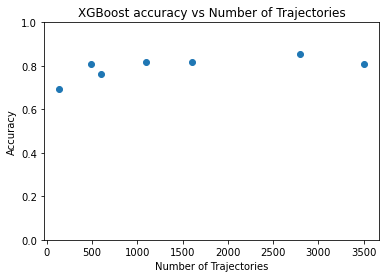

In [140]:
trajs = [140, 488, 600, 1100, 1600, 2800, 3500]
acc = [0.6932, 0.8069, 0.7624, 0.8155, 0.8182, 0.8552, 0.8090]
plt.scatter(trajs, acc)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.xlabel('Number of Trajectories')
plt.title('XGBoost accuracy vs Number of Trajectories')

Text(0.5, 1.0, 'XGBoost accuracy vs Number of Trajectories')

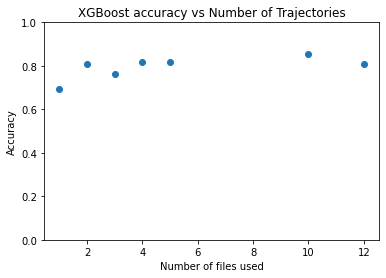

In [141]:
files = [1, 2, 3, 4, 5, 10, 12]
plt.scatter(files, acc)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.xlabel('Number of files used')
plt.title('XGBoost accuracy vs Number of Trajectories')

In [154]:
region_filelist = ['one_file_run_data.csv',
            'two_file_run_data.csv',
            'three_file_run_data.csv',
            'four_file_run_data.csv',
            'five_file_run_data.csv',
            'six_file_run_data.csv']

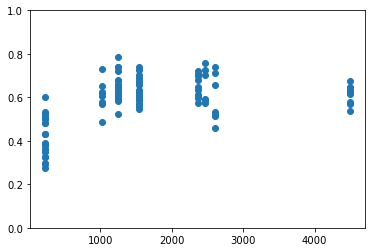

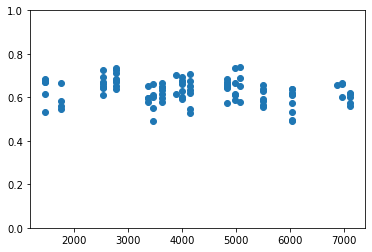

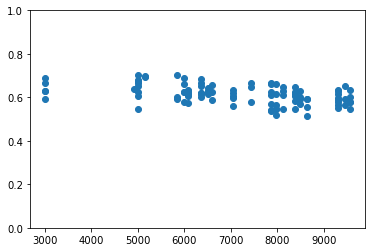

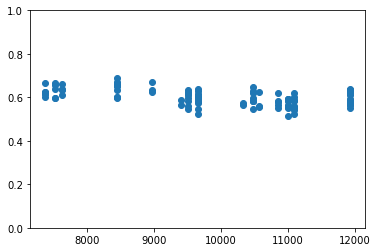

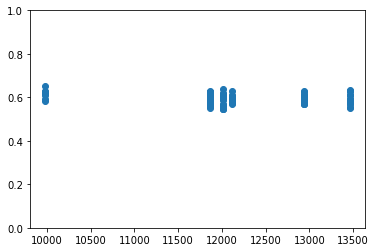

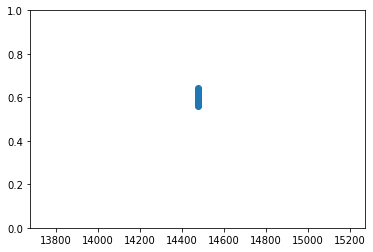

In [155]:
accuracy_list = []
min_acc = []
max_acc = []
var_list = []
stdev_list = []
traj_count_list = []
for file in region_filelist:
    df = pd.read_csv(workbookDir + '/data/region_traj_count_outputs/' + file)
    accuracy_list.append(df['Accuracies'].mean())
    min_acc.append(df['Accuracies'].min())
    max_acc.append(df['Accuracies'].max())
    var_list.append(df['Accuracies'].var())
    stdev_list.append(df['Accuracies'].std())
    traj_count_list.append(df['Trajectory Count'].mean())
    fig = plt.subplots()
    plt.scatter(df['Trajectory Count'], df['Accuracies'])
    plt.ylim([0,1])

Text(0.5, 1.0, 'Mean accuracy across 100 models')

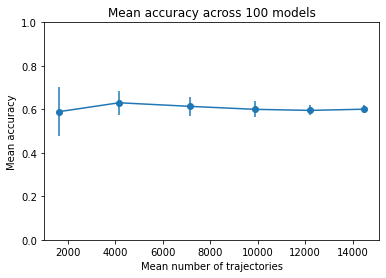

In [175]:
fig, ax = plt.subplots()
ax.errorbar(traj_count_list, accuracy_list, yerr=stdev_list, fmt='-o')
#ax.errorbar(np.arange(1,7), accuracy_list, yerr=stdev_list, fmt='-o')

# plt.scatter(x=traj_count_list, y=accuracy_list, c='m')
# plt.scatter(traj_count_list, min_acc, c='g')
# plt.scatter(traj_count_list, max_acc, c='b')
plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 100 models')

Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

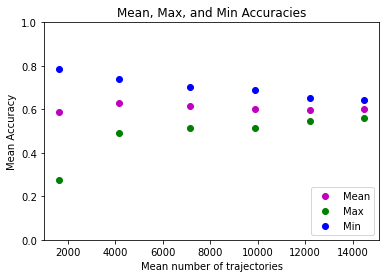

In [160]:
fig, ax = plt.subplots()
plt.scatter(x=traj_count_list, y=accuracy_list, c='m', label='Mean')
plt.scatter(traj_count_list, min_acc, c='g', label='Max')
plt.scatter(traj_count_list, max_acc, c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

Text(0.5, 1.0, 'Mean Accuracy vs Standard Deviation for random file subsets')

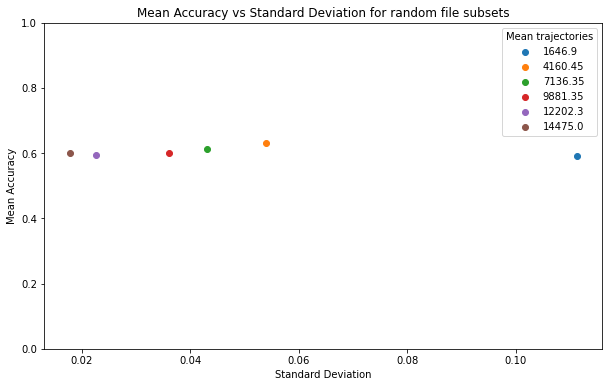

In [174]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(accuracy_list)):
    plt.scatter(stdev_list[i], accuracy_list[i], label=traj_count_list[i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard Deviation for random file subsets')

In [85]:
region_500model_filelist = ['region500model_1file_run_data.csv', 
                            'region500model_2file_run_data.csv',
                            'region500model_3file_run_data.csv',
                            'region500model_4file_run_data.csv',
                            'region500model_5file_run_data.csv',
                            'region500model_6file_run_data.csv'
                            ]

In [86]:
accuracy_list = []
min_acc = []
max_acc = []
var_list = []
stdev_list = []
traj_count_list = []
frames_list = []
for file in region_500model_filelist:
    df = pd.read_csv(workbookDir + '/data/region_500models_traj_count_outputs/' + file)
    print(df.columns)
    break
    accuracy_list.append(df['Accuracies'].mean())
    min_acc.append(df['Accuracies'].min())
    max_acc.append(df['Accuracies'].max())
    var_list.append(df['Accuracies'].var())
    stdev_list.append(df['Accuracies'].std())
    traj_count_list.append(df['Trajectory Count'].mean())
    # create frame list
    

Index(['Accuracies', 'True Labels', 'Preds', 'Trajectory Count', 'Frames'], dtype='object')


In [122]:
df['Frames'][1][1:(len(df['Frames'][1])-1)]

'163.0, 651.0, 24.0, 47.0, 175.0, 11.0, 11.0, 53.0, 12.0, 272.0, 260.0, 33.0, 651.0, 15.0, 106.0, 25.0, 30.0, 651.0, 277.0, 26.0, 21.0, 20.0, 370.0, 14.0, 651.0, 330.0, 14.0, 183.0, 84.0, 25.0, 24.0, 45.0, 651.0, 651.0, 36.0, 21.0, 651.0, 651.0, 14.0, 21.0, 34.0, 74.0, 280.0, 21.0, 122.0, 48.0, 105.0, 13.0, 77.0, 32.0, 11.0, 13.0, 14.0, 15.0, 22.0, 31.0, 18.0, 59.0, 651.0, 21.0, 30.0, 16.0, 24.0, 13.0, 54.0, 22.0, 12.0, 15.0, 95.0, 15.0, 12.0, 355.0, 12.0, 25.0, 153.0, 11.0, 19.0, 12.0, 19.0, 106.0, 31.0, 12.0, 16.0, 21.0, 13.0, 23.0, 218.0, 12.0, 73.0, 142.0, 31.0, 16.0, 29.0, 18.0, 21.0, 12.0, 23.0, 19.0, 13.0, 11.0, 18.0, 25.0, 35.0, 21.0, 13.0, 51.0, 11.0, 37.0, 27.0, 11.0, 11.0, 22.0, 11.0, 99.0, 19.0, 18.0, 86.0, 23.0, 24.0, 15.0, 11.0, 21.0, 35.0, 19.0, 265.0, 14.0, 21.0, 14.0, 33.0, 11.0, 19.0, 11.0, 46.0, 26.0, 29.0, 23.0, 14.0, 12.0, 651.0, 71.0, 403.0, 53.0, 12.0, 28.0, 651.0, 64.0, 477.0, 16.0, 17.0, 32.0, 35.0, 651.0, 53.0, 26.0, 42.0, 35.0, 80.0, 68.0, 104.0, 22.0, 17.0, 

In [140]:
frame_list = []
file_counter = 0
for file in region_500model_filelist:
    
    df = pd.read_csv(workbookDir + '/data/region_500models_traj_count_outputs/' + file)
    subset_frames_list = []
    for i in range(0,len(df)):
        frames_string = df['Frames'][i][1:(len(df['Frames'][i])-1)]
        frames_list = frames_string.split(", ")
        list_of_floats = []
        for val in frames_list:
            list_of_floats.append(float(val))
        frames_array = np.array(list_of_floats)

        mean_of_frames = frames_array.mean()
        subset_frames_list.append(mean_of_frames)
    subset_frames_array = np.array(subset_frames_list)
    sfa_mean = subset_frames_array.mean()
    frame_list.append(sfa_mean)


6
6


In [141]:
frame_list

[81.4968033869346,
 82.3370609140252,
 82.70573872402817,
 83.23117359740706,
 83.44223406488561,
 83.47439046632124]

In [103]:
my_string = df['Frames'][0][1:(len(df['Frames'][0])-1)]
my_list = my_string.split(", ")
my_array = np.array(my_list)

In [104]:
float_array = []
for val in my_array:
    float_array.append(float(val))
float_array = np.array(float_array)

In [105]:
float_array

array([15., 11., 57., ..., 15., 11., 32.])

Text(0.5, 1.0, 'Mean accuracy across 500 models')

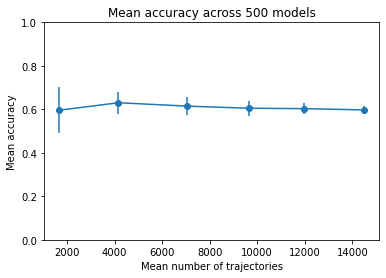

In [17]:
fig, ax = plt.subplots()
ax.errorbar(traj_count_list, accuracy_list, yerr=stdev_list, fmt='-o')
#ax.errorbar(np.arange(1,7), accuracy_list, yerr=stdev_list, fmt='-o')

# plt.scatter(x=traj_count_list, y=accuracy_list, c='m')
# plt.scatter(traj_count_list, min_acc, c='g')
# plt.scatter(traj_count_list, max_acc, c='b')
plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

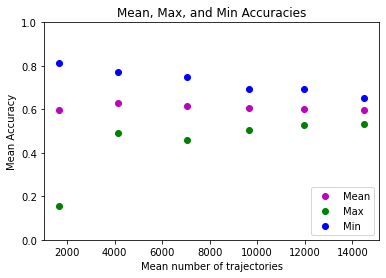

In [18]:
fig, ax = plt.subplots()
plt.scatter(x=traj_count_list, y=accuracy_list, c='m', label='Mean')
plt.scatter(traj_count_list, min_acc, c='g', label='Max')
plt.scatter(traj_count_list, max_acc, c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

Text(0.5, 1.0, 'Mean Accuracy vs Standard Deviation for random file subsets')

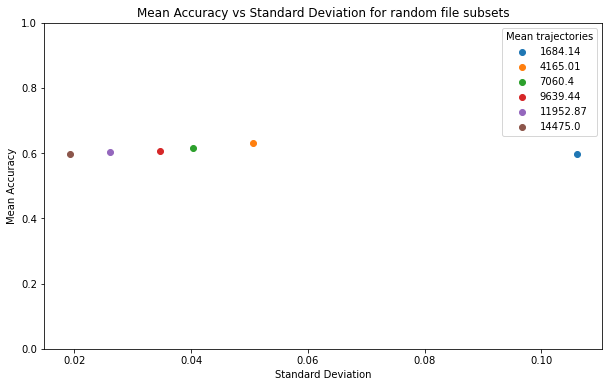

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(accuracy_list)):
    plt.scatter(stdev_list[i], accuracy_list[i], label=traj_count_list[i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard Deviation for random file subsets')

In [1]:
region_500model_filelist = ['age_500model_1file_run_data.csv',
                            'age_500model_2file_run_data.csv',
                            'age_500model_3file_run_data.csv',
                            'age_500model_4file_run_data.csv',
                            'age_500model_5file_run_data.csv',
                            'age_500model_6files_run_data.csv',
                            'age_500model_7files_run_data.csv',
                            'age_500model_8files_run_data.csv',
                            'age_500model_9files_run_data.csv',
                            'age_500model_10files_run_data.csv',
                            'age_500model_11files_run_data.csv',
                            'age_500model_12file_run_data.csv',
                            'age_500model_13file_run_data.csv',
                            'age_500model_14file_run_data.csv',
                            'age_500model_15file_run_data.csv',
                            ]

In [80]:
accuracy_list = []
min_acc = []
max_acc = []
var_list = []
stdev_list = []
traj_count_list = []
#frames_list = []
for file in region_500model_filelist:
    df = pd.read_csv(workbookDir + '/data/age_500models_traj_count_outputs/' + file)
    accuracy_list.append(df['Accuracies'].mean())
    min_acc.append(df['Accuracies'].min())
    max_acc.append(df['Accuracies'].max())
    var_list.append(df['Accuracies'].var())
    stdev_list.append(df['Accuracies'].std())
    traj_count_list.append(df['Trajectory Count'].mean())
    # create frame list

Text(0.5, 1.0, 'Mean accuracy across 500 models')

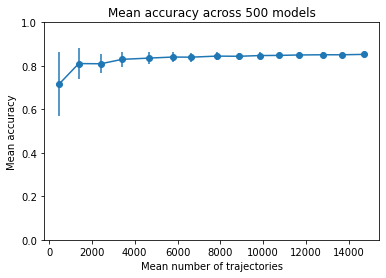

In [81]:
fig, ax = plt.subplots()
ax.errorbar(traj_count_list, accuracy_list, yerr=stdev_list, fmt='-o')
#ax.errorbar(np.arange(1,7), accuracy_list, yerr=stdev_list, fmt='-o')

# plt.scatter(x=traj_count_list, y=accuracy_list, c='m')
# plt.scatter(traj_count_list, min_acc, c='g')
# plt.scatter(traj_count_list, max_acc, c='b')
plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean Accuracy vs Standard Deviation for random file subsets')

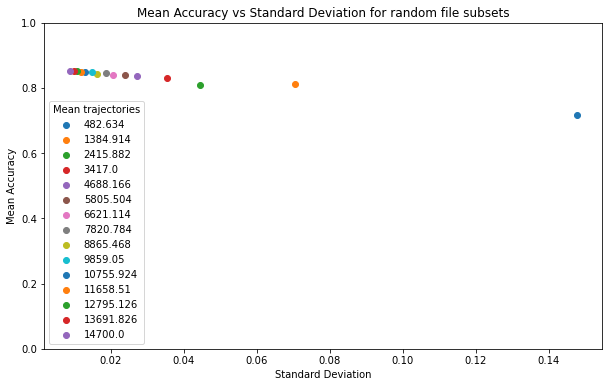

In [84]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(accuracy_list)):
    plt.scatter(stdev_list[i], accuracy_list[i], label=traj_count_list[i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard Deviation for random file subsets')

In [4]:
region_hip_cort_striat_filelist = ['region_hippo_cort_striat_500model_one_files.csv',
                                   'region_hippo_cort_striat_500model_two_files.csv',
                                   'region_hippo_cort_striat_500model_three_files.csv',
                                   'region_hippo_cort_striat_500model_four_files.csv',
                                   'region_hippo_cort_striat_500model_five_files.csv',
                                   'region_hippo_cort_striat_500model_six_files.csv'
                                   ]

In [5]:
accuracy_list = []
min_acc = []
max_acc = []
var_list = []
stdev_list = []
traj_count_list = []
#frames_list = []
for file in region_hip_cort_striat_filelist:
    df = pd.read_csv(workbookDir + '/data/region_hippo_cort_striat_traj_count_outputs/' + file)
    accuracy_list.append(df['Accuracies'].mean())
    min_acc.append(df['Accuracies'].min())
    max_acc.append(df['Accuracies'].max())
    var_list.append(df['Accuracies'].var())
    stdev_list.append(df['Accuracies'].std())
    traj_count_list.append(df['Trajectory Count'].mean())

Text(0.5, 1.0, 'Mean accuracy across 500 models')

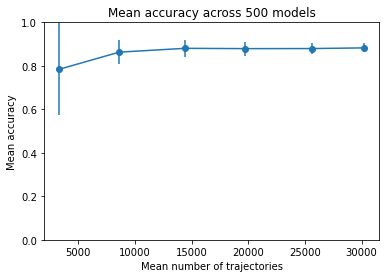

In [6]:
fig, ax = plt.subplots()
ax.errorbar(traj_count_list, accuracy_list, yerr=stdev_list, fmt='-o')
#ax.errorbar(np.arange(1,7), accuracy_list, yerr=stdev_list, fmt='-o')

# plt.scatter(x=traj_count_list, y=accuracy_list, c='m')
# plt.scatter(traj_count_list, min_acc, c='g')
# plt.scatter(traj_count_list, max_acc, c='b')
plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

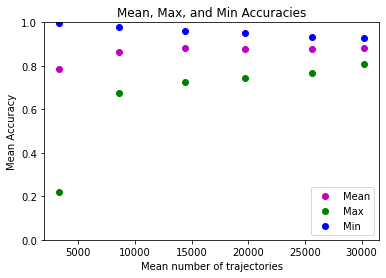

In [7]:
fig, ax = plt.subplots()
plt.scatter(x=traj_count_list, y=accuracy_list, c='m', label='Mean')
plt.scatter(traj_count_list, min_acc, c='g', label='Max')
plt.scatter(traj_count_list, max_acc, c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

Text(0.5, 1.0, 'Mean Accuracy vs Standard Deviation for random file subsets')

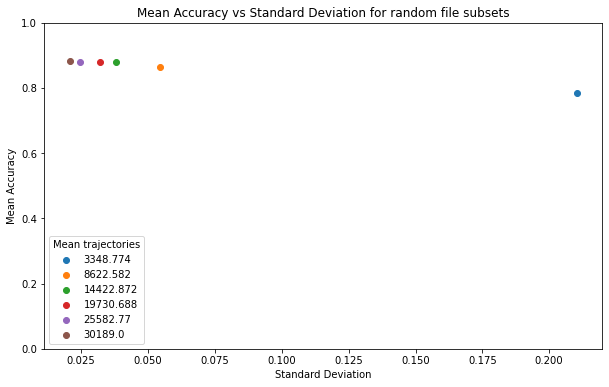

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(accuracy_list)):
    plt.scatter(stdev_list[i], accuracy_list[i], label=traj_count_list[i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard Deviation for random file subsets')

In [8]:
region_cort_striat_filelist = ['region_cort_striat_500model_one_file.csv',
                                   'region_cort_striat_500model_two_files.csv',
                                   'region_cort_striat_500model_three_files.csv',
                                   'region_cort_striat_500model_four_files.csv',
                                   'region_cort_striat_500model_five_files.csv',
                                   'region_cort_striat_500model_six_files.csv',
                                   'region_cort_striat_500model_seven_files.csv',
                                   'region_cort_striat_500model_eight_files.csv',
                                   'region_cort_striat_500model_nine_files.csv',
                                   'region_cort_striat_500model_ten_files.csv'
                                   ]

In [9]:
accuracy_list = []
min_acc = []
max_acc = []
var_list = []
stdev_list = []
traj_count_list = []
#frames_list = []
for file in region_cort_striat_filelist:
    df = pd.read_csv(workbookDir + '/data/region_cort_striat_traj_count_outputs/' + file)
    accuracy_list.append(df['Accuracies'].mean())
    min_acc.append(df['Accuracies'].min())
    max_acc.append(df['Accuracies'].max())
    var_list.append(df['Accuracies'].var())
    stdev_list.append(df['Accuracies'].std())
    traj_count_list.append(df['Trajectory Count'].mean())

Text(0.5, 1.0, 'Mean accuracy across 500 models')

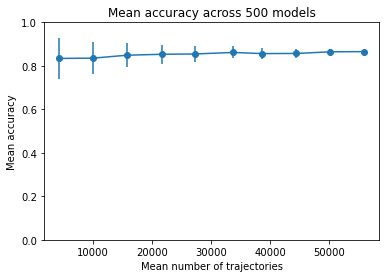

In [27]:
fig, ax = plt.subplots()
ax.errorbar(traj_count_list, accuracy_list, yerr=stdev_list, fmt='-o')
#ax.errorbar(np.arange(1,7), accuracy_list, yerr=stdev_list, fmt='-o')

# plt.scatter(x=traj_count_list, y=accuracy_list, c='m')
# plt.scatter(traj_count_list, min_acc, c='g')
# plt.scatter(traj_count_list, max_acc, c='b')
plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean, Max, and Min Accuracies')

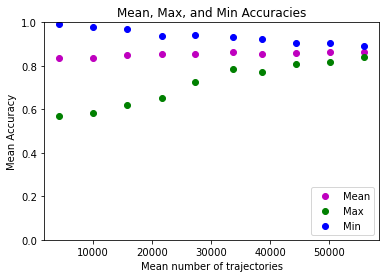

In [10]:
fig, ax = plt.subplots()
plt.scatter(x=traj_count_list, y=accuracy_list, c='m', label='Mean')
plt.scatter(traj_count_list, min_acc, c='g', label='Max')
plt.scatter(traj_count_list, max_acc, c='b', label='Min')
plt.ylim([0,1])
plt.legend(loc=4)
plt.xlabel('Mean number of trajectories')
plt.ylabel('Mean Accuracy')
plt.title('Mean, Max, and Min Accuracies')

Text(0.5, 1.0, 'Mean Accuracy vs Standard deviation for random file subsets')

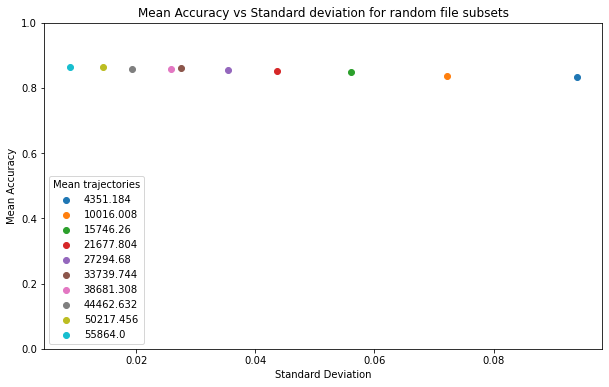

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(accuracy_list)):
    plt.scatter(stdev_list[i], accuracy_list[i], label=traj_count_list[i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard deviation for random file subsets')

In [31]:
region_hippo_gangl_thala_filelist = ['region_hippo_gangl_thala_500model_one_file.csv',
                                   'region_hippo_gangl_thala_500model_two_files.csv',
                                   'region_hippo_gangl_thala_500model_three_files.csv',
                                   'region_hippo_gangl_thala_500model_four_files.csv',
                                   'region_hippo_gangl_thala_500model_five_files.csv',
                                   'region_hippo_gangl_thala_500model_six_files.csv'
                                   ]

In [33]:
accuracy_list = []
min_acc = []
max_acc = []
var_list = []
stdev_list = []
traj_count_list = []
#frames_list = []
for file in region_hippo_gangl_thala_filelist:
    df = pd.read_csv(workbookDir + '/data/region_hippo_gangl_thala_500model_traj_count_outputs/' + file)
    accuracy_list.append(df['Accuracies'].mean())
    min_acc.append(df['Accuracies'].min())
    max_acc.append(df['Accuracies'].max())
    var_list.append(df['Accuracies'].var())
    stdev_list.append(df['Accuracies'].std())
    traj_count_list.append(df['Trajectory Count'].mean())

Text(0.5, 1.0, 'Mean accuracy across 500 models')

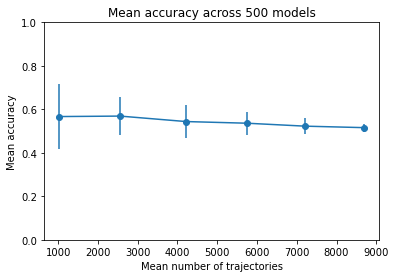

In [34]:
fig, ax = plt.subplots()
ax.errorbar(traj_count_list, accuracy_list, yerr=stdev_list, fmt='-o')
#ax.errorbar(np.arange(1,7), accuracy_list, yerr=stdev_list, fmt='-o')

# plt.scatter(x=traj_count_list, y=accuracy_list, c='m')
# plt.scatter(traj_count_list, min_acc, c='g')
# plt.scatter(traj_count_list, max_acc, c='b')
plt.ylim([0,1])
plt.ylabel('Mean accuracy')
plt.xlabel('Mean number of trajectories')
plt.title('Mean accuracy across 500 models')

Text(0.5, 1.0, 'Mean Accuracy vs Standard deviation for random file subsets')

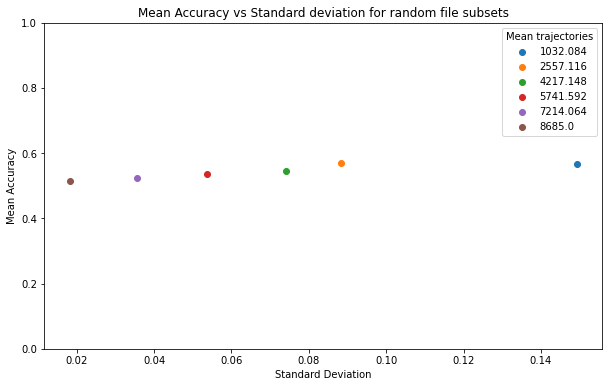

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(accuracy_list)):
    plt.scatter(stdev_list[i], accuracy_list[i], label=traj_count_list[i])
plt.legend(loc=0, title='Mean trajectories')
plt.ylim([0,1])
plt.ylabel('Mean Accuracy')
plt.xlabel('Standard Deviation')
plt.title('Mean Accuracy vs Standard deviation for random file subsets')